In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

%matplotlib inline  

In [2]:
pi_true = np.array([0.35, 0.45, 0.2])
mu_true = np.array([-2,1,5])
sigma_true = np.array([0.9, 0.3, .7])
col = ['b', 'r', 'g']

N = 10000
obs = np.zeros(N)

for i in range(N):
    z = np.random.random_sample()
    idx = 0
    tempSum = 0
    
    for j in range(np.size(pi_true)):
        if ((z > tempSum) & (z<=tempSum+pi_true[j])):
            idx = j
            break
        else:
            tempSum = tempSum + pi_true[j]
    
    v_temp = np.random.normal(mu_true[idx], sigma_true[idx], 1)
    obs[i] = v_temp;

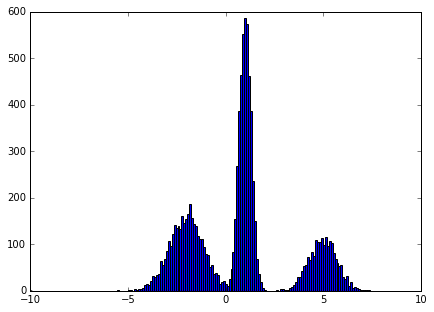

In [3]:
plt.figure(1, figsize=(7,5))
plt.hist(obs, bins=np.linspace(-10,10,(10-(-10))/0.1))
plt.show()

In [4]:
cnt = -1
cnt2 = -1
cnt3 = -1
discarded = 0
obs = np.zeros(N)
#samples = np.zeros(N*100)
#rejected_samples = np.zeros(N*100)
samples = []
rejected_samples = []

M = 20
mu_assumed = np.array([0,0,0])
sigma_assumed = np.array([0.5, 0.5, 0.5])

while cnt < N-1:
    idx = np.random.random_integers(3)-1
    sample = np.random.normal(mu_assumed[idx], sigma_assumed[idx])
    q = 1/3. * multivariate_normal.pdf(sample, mu_assumed[idx], sigma_assumed[idx])
    p = pi_true[idx] * multivariate_normal.pdf(sample, mu_true[idx], sigma_true[idx])
    u = np.random.random_sample()
    
    if u*M*q < p:
        cnt = cnt + 1
        obs[cnt] = sample
    else:
        discarded = discarded + 1
        cnt2 = cnt2 + 1
        rejected_samples.append(sample)
    
    cnt3 = cnt3 + 1
    samples.append(sample)

In [5]:
rejected_samples = np.asarray(rejected_samples)
samples = np.asarray(samples)

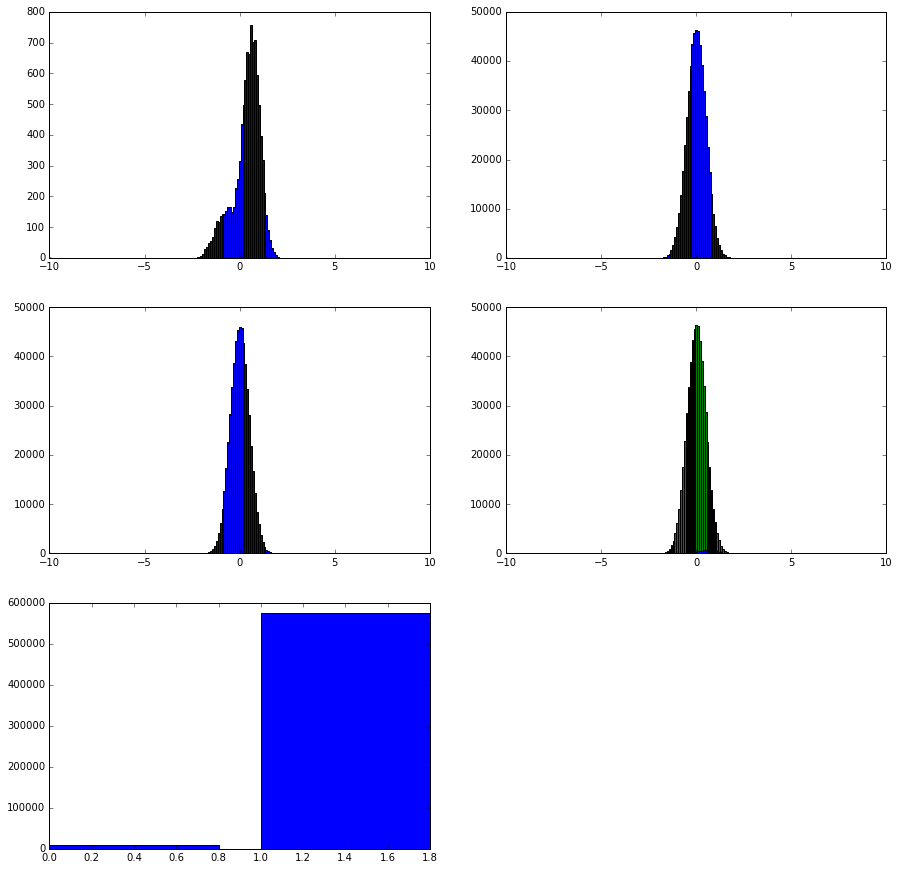

In [42]:
plt.figure(1, figsize=(15,15))
plt.subplot(3, 2, 1)
plt.hist(obs, bins=np.linspace(-10,10,(10-(-10))/0.1))

plt.subplot(3, 2, 2)
plt.hist(samples, bins=np.linspace(-10,10,(10-(-10))/0.1))

plt.subplot(3, 2, 3)
plt.hist(rejected_samples, bins=np.linspace(-10,10,(10-(-10))/0.1))

plt.subplot(3, 2, 4)
displayStackedHistogram(obs, rejected_samples, 200, -10, 10)

plt.subplot(3, 2, 5)
plt.bar(range(len([cnt, discarded])), np.array([cnt, discarded]))
plt.show()

In [41]:
def displayStackedHistogram(data1, data2, nbins, lowBound, highBound):
    data = [data1, data2]    
    bins = np.linspace(lowBound, highBound, nbins)
    
    plt.hist(data, bins,  histtype='bar', stacked=True)